# Support Vector Machine (SVM)
- SVM is a supervised machine learning model for classification tasks. It's really good at doing both classification and regression simultaneously.
- If you have a lot of data that needs to be classified, an SVM can help you achieve that
- For two dimensions (when we have two features), assume the target has two classes. The SVM will obtain the best line that seperates the data into two groups

### What are support vectors?
**Support vectors** are the datapoints that lie closest to the decision boundary (best line, seen in red below

## Find the support vectore of the healthy brain dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('../Data/LinearSVMDataset.csv')
df

,Unnamed: 0,X1,X2,y
0,0,2.947814,6.626878,1
1,1,2.530388,7.785050,1
2,2,3.566991,5.651046,1
3,3,3.156983,5.467077,1
4,4,2.582346,4.457777,-1
5,5,2.155826,6.222343,-1
6,6,3.273418,3.520687,-1


In [2]:
# 1 = Heathy Brain, -1 = Not a Healthy Brain

# df['y'] = df['y'].apply(lambda x: 'H' if x == 1 else 'NH')
df['y'] = df['y'].map({1: 'H', -1: 'NH'})

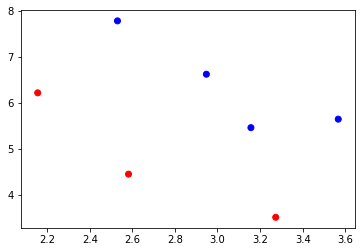

In [3]:
fig, ax = plt.subplots()
color_ls = df['y'].map({'H': 'blue', 'NH': 'red'})
ax.scatter(df['X1'], df['X2'], c=color_ls)
# plt.text(df['X1'], df['X2'], df['y'])

## Obtaining the Line of Best Fit using Sklearn

In [4]:
X1 = df['X1']
X2 = df['X2']
X_train = np.array(list(zip(X1,X2)))
Y_train=df['y'].values

In [5]:
from sklearn import svm

# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=10)
# find the best fit line
svm_classifier.fit(X_train, Y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

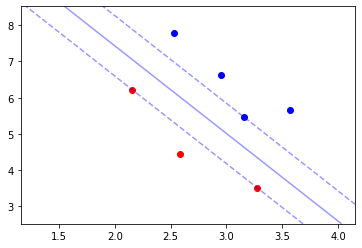

In [7]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, Y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    # plt.text(i+0.02, j+0.02, label[k])

### Support Vectors of the data

In [8]:
# Number of support vectors
svm_classifier.n_support_

array([1, 2], dtype=int32)

In [9]:
# What are those support vectors?
svm_classifier.support_vectors_

array([[3.156983, 5.467077],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

### Obtain the slope (weight) and intercept for the best fit line equation: 

In [10]:
weight = svm_classifier.coef_
intercept = svm_classifier.intercept_

print(weight)
print(intercept)

[[-2.90245824 -1.20066026]]
[14.7277751]


## Activity: Check that the points (3, 5) and (2, 7.5) are very close to the best line

In [11]:
print(weight[0][0]*3+weight[0][1]*5+intercept[0])
print(weight[0][0]*2+weight[0][1]*7.5+intercept[0])

0.01709907833749824
-0.08209332606764619


## Activity: Detrmine if a patient  with 3 Serotonin and 6 Dopamine is healthy or not

In [12]:
svm_classifier.predict([[3, 6]])

array(['H'], dtype=object)

# SVM Training For Non-Linearly Separable Data

In [13]:
df2 = pd.read_csv('../Data/NonlinearSVMDataset.csv')

X1 = df2['x1']
X2 = df2['x2']

X_train = np.array(list(zip(X1,X2)))
Y_train=df2['y'].values

## How create SVMs for non-linear data?
- Use polynomial as kernel
- If polynomical doesn't work, use Radial Basis Function (RBF) as the Kernel

In [14]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)
svm_classifier.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

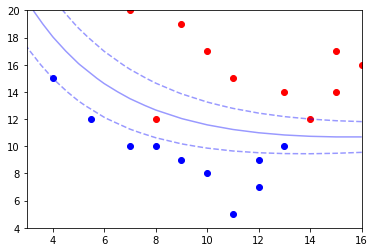

In [15]:
plot_decision_boundary(svm_classifier, X_train, Y_train)
color_ls = df2['y'].map({1: 'b', -1:'r'})
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])

## Kernels in SVM and their parameters:
**Type of kernels:**
- Linear
- Polynomial
- RBF (Gaussian)

**There are two parameters for each of these:**
- Gamma (for RBF only). This is the "spread" of the decision region (kernel)
- C (for all of them). This is the threshold for misclassifying data.

## Activity: Obtain which line from the previous example will have the lowest error
**Follow these steps:**
- Train two SVM models: one with class weights, and one without
- Pass the dataset into your SVM models
- Compare the model predictions with known classes
- Report which one has the lowest mistakes (error rate)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [17]:
from sklearn import svm

svm_no_weight = svm.SVC(kernel='linear', C=10)
svm_weight = svm.SVC(kernel='linear', C=10)

svm_no_weight.fit(X, y)
svm_weight.fit([x*1.06 for x in X], y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

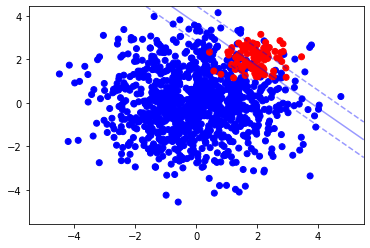

In [18]:
plot_decision_boundary(svm_no_weight, X, y)
plt.scatter(X[:, 0], X[:, 1], color=['blue' if point == 0 else 'red' for point in y])

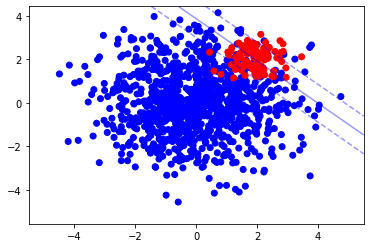

In [19]:
plot_decision_boundary(svm_weight, X, y)
plt.scatter(X[:, 0], X[:, 1], color=['blue' if point == 0 else 'red' for point in y])